# Lending Club Case study

## Data Understanding

### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Load Loan Dataset to pandas dataframe

In [30]:
loan_df=pd.read_csv('./loan/loan.csv')
loan_df.head()

C:\Users\saravanan.ponmudi\AppData\Local\Temp\ipykernel_22212\4217034196.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df=pd.read_csv('./loan/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [31]:
loan_df.shape

(39717, 111)

### Describe dataframe

In [32]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Dataframe null count info

In [33]:
# Check for missing values in each column
missing_data = loan_df.isnull().sum()

# Display columns with missing values (if any)
missing_data = missing_data[missing_data > 0]
missing_data

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

### Data Quality

In [34]:
# Finding number of rows through sum function which have missing values

print('Number of rows having all values as null:')
print(loan_df.isnull().all(axis=1).sum())

# Output-
# There are 0 empty rows or rows having all the values as null in the entire dataset


# Finding the number of columns through sum function which have missing values

print('Number of columns having all values as null:')
print(loan_df.isnull().all(axis=0).sum())

# Output-
# There are 54 empty columns or columns having all the values as null in the entire dataset

Number of rows having all values as null:
0
Number of columns having all values as null:
54


In [35]:
#Find the percentage of missing values in each column of the dataset 'loan_df'.
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.59
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [36]:
columns_with_missing_values = list(missing[missing >= 50].index)
len(columns_with_missing_values)

57

#### There were 57 columns with more than 50% values as missing. Removing such columns as these columns clearly add noise and wont help in analysis.

In [37]:
loan_df.drop(columns_with_missing_values,axis=1,inplace=True)
loan_df.shape

(39717, 54)

Let's remove the desc column because purpose and title column will do same for the data.

In [38]:
loan_df.drop('desc',axis=1,inplace=True)

#### Summary of Data Quality step:

In [39]:
print("unique emp_title : %d"  % len(loan_df.emp_title.unique()))
print("unique emp_length : %d"  % len(loan_df.emp_length.unique()))
print("unique title : %d"  % len(loan_df.title.unique()))
print("unique revol_util : %d"  % len(loan_df.revol_util.unique()))
print("unique title : %d"  % len(loan_df.title.unique()))
print("unique last_pymnt_d : %d"  % len(loan_df.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan_df.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan_df.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan_df.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan_df.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan_df.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique title : 19616
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


## Data Cleaning and Manipulation

Columns <b>emp_length, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies</b> and <b>tax_liens</b> are clearly Categorical with values belonging to a range.

In [40]:
loan_df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [41]:
loan_df.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [42]:
loan_df.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [43]:
loan_df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [44]:
loan_df.tax_liens.unique()

array([ 0., nan])

The columns <b>collections_12_mths_ex_med, chargeoff_within_12_mths </b>and <b>tax_liens</b> has either value of 0 or nan(no entry/blank). The range of values that these categorical columns can take is not of any significant impact to the analysis.
We can decide to drop these columns for analysis.

In [45]:
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan_df.drop(drop_columnlist,axis=1,inplace=True)

In [46]:
loan_df.shape

(39717, 50)

Next, lets look at the pub_rec_bankruptcies categorical column with 1.76% missing data. It tells us about the past number of public record bankruptcies of that borrower.

In [47]:
loan_df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

pub_rec_bankruptcies can be seen to have taking values like [0,1,2]. Almost 35000 records with 0 record of bankrupcies, 1500 records having one bankrupcies case and 7 records with two bankrupcies case. While we could have taken the mode representation of the data which is 0 bankrupcies to impute the missing values. But, we decide to remove the rows instead so that we ensure we dont add any bais to the data.

In [48]:
loan_df=loan_df[~loan_df.pub_rec_bankruptcies.isnull()]

In [49]:
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2) 
missing[missing != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Next, the columns emp_title, emp_length have 6.19% and 2.71% missing value. These columns have information about the customer/borrower like their job title and their employment length in years. Let's remove the rows with nan/blank values for these varaibles.

In [50]:
loan_df=loan_df[~loan_df.emp_title.isnull()]
loan_df=loan_df[~loan_df.emp_length.isnull()]

In [51]:
loan_df.shape

(36548, 50)

In [52]:
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Now, we are left with 3 columns title, revol_util and last_pymnt_d which account for a very small % of missing value of 0.02%, 0.13% and 0.18% respectively. title gives the title of the loan specified by the borrower in the application. revol_util gives the revolving line utelization and last_pymnt_d gives the month in which last payment was received.

Let's again remove the rows with null value for these variables.

In [53]:
loan_df=loan_df[~loan_df.title.isnull()]
loan_df=loan_df[~loan_df.revol_util.isnull()]
loan_df=loan_df[~loan_df.last_pymnt_d.isnull()]

In [54]:
loan_df.shape

(36433, 50)

In [55]:
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2) 
missing[missing != 0]

Series([], dtype: float64)

Now, we have now reduced the data set to have 36433 loan records and 50 attributes with no missing values. Let's write it into another file and use that file for further analysis.

In [55]:
loan_df.to_csv('clean_loan.csv', encoding='utf-8', index=False)

Further shortlist and narrow down the columns for analysis

In [57]:
clean_loan = loan_df[:]

In [58]:
clean_loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

A data dictionary file is also been provided along with the loan data. This file gives a brief describtion about all the columns of the loan transaction file. Let's use this file to get a better understanding of the 50 columns we are left with. This will help to further narrow down on the columns.

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

These columns are:
<ol>
<li><b>id</b> : is a random number given to the loan, does not contribute to analysis
<li><b>member_id </b>: is a random number given to the member, does not contribute to analysis
<li><b>pymnt_plan </b>: value for entire dataset is 'n', therefore can be removed.
<li><b>url </b>: is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
<li><b>zip_code </b>: first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
<li><b>initial_list_status </b>: value for entire dataset is 'f' out of the possible values, therefore can be removed.
<li><b>policy_code </b>: value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
<li><b>application_type </b>: value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
<li><b>acc_now_delinq</b> : value for entire dataset is '0', therefore can be removed.
<li><b>delinq_amnt </b>: value for entire dataset is '0', therefore can be removed.
<li><b>funded_amnt </b>: value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
<li><b>funded_amnt_inv </b>: value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.
</ol>
<br>
Dropping the above columns from the clean_loan dataframe.

In [59]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
clean_loan= clean_loan.drop(columns_tobe_dropped,axis=1)

In [60]:
clean_loan.shape

(36433, 38)

Columns for analysis reduced to 38 columns.

### Standardise values

Next, let's standardize the precision of the data. There are certain columns with need rounding of the values up until two decimal places.

These columns are:
<ol>
<li><b>total_pymnt</b>
<li><b>total_rec_late_fee</b>
<li><b>collection_recovery_fee</b>
</ol>

In [61]:
clean_loan.total_pymnt.value_counts().tail()

total_pymnt
5661.170000     1
40297.372600    1
9536.544293     1
4577.397548     1
3579.662273     1
Name: count, dtype: int64

In [62]:
clean_loan.total_rec_late_fee.value_counts().tail()

total_rec_late_fee
30.260000    1
14.946207    1
25.530000    1
14.987132    1
52.262227    1
Name: count, dtype: int64

In [63]:
clean_loan.collection_recovery_fee.value_counts().tail()

collection_recovery_fee
2.9400      1
9.5864      1
14.5170     1
15.3684     1
668.3600    1
Name: count, dtype: int64

In [64]:
clean_loan.total_pymnt= round(clean_loan.total_pymnt,2)
clean_loan.total_rec_late_fee= round(clean_loan.total_rec_late_fee,2)
clean_loan.collection_recovery_fee= round(clean_loan.collection_recovery_fee,2)

### Fix invalid values

Next, there are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.

These columns are:
<ol>
<li>issue_d
<li>earliest_cr_line
<li>last_pymnt_d
<li>last_credit_pull_d
<ol>

In [65]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
clean_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


Converting the dtype of these columns to datetime

In [66]:
clean_loan.issue_d = pd.to_datetime(clean_loan.issue_d, format='%b-%y')
clean_loan.earliest_cr_line = pd.to_datetime(clean_loan.earliest_cr_line, format='%b-%y')
clean_loan.last_pymnt_d = pd.to_datetime(clean_loan.last_pymnt_d, format='%b-%y')
clean_loan.last_credit_pull_d = pd.to_datetime(clean_loan.last_credit_pull_d, format='%b-%y')

In [67]:
clean_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


Dropping Duplicated rows if any,

In [68]:
clean_loan=clean_loan.drop_duplicates()
clean_loan.shape

(36433, 38)

### Filter data

Next, there are few columns expressing % like int_rate and revol_util. These has values like '15.27%' and '9.40%'. Further these columns has dtype as 'object'. Let's convert these columns to have just the value withoout '%' and typecast it to float.

In [69]:
clean_loan.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [70]:
clean_loan.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [71]:
clean_loan['int_rate'] = clean_loan['int_rate'].str.strip('%').astype('float')
clean_loan['revol_util'] = clean_loan['revol_util'].str.strip('%').astype('float')

In [72]:
clean_loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 853.9 KB


Let us now take a look at the <b>emp_length</b> column.

In [73]:
clean_loan.emp_length.value_counts()

emp_length
10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: count, dtype: int64

According to the data_dictionary file description for this field, emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. Let's convert the column to have values between 0 and 10.

In [74]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [75]:
clean_loan = clean_loan.replace({"emp_length": emp_length_dict })

In [76]:
clean_loan.emp_length.value_counts()

emp_length
10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: count, dtype: int64

The column term: The number of payments on the loan. Values are in months and can be either 36 or 60.
removing the months string from within the column term.

In [77]:
clean_loan.term.value_counts()

term
36 months    26377
60 months    10056
Name: count, dtype: int64

In [78]:
clean_loan['term'] = clean_loan.term.apply(lambda x: x.split()[0])
clean_loan.term.value_counts()

term
36    26377
60    10056
Name: count, dtype: int64

<b>earliest_cr_line</b> : The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year

Lets split the available date into month and year column.

In [79]:
clean_loan['earliest_cr_line_month'] = clean_loan['earliest_cr_line'].dt.month
clean_loan['earliest_cr_line_year'] = clean_loan['earliest_cr_line'].dt.year
len(clean_loan[clean_loan['earliest_cr_line_year'] > 2011 ])

50

We see that there are 50 records with the earliest credit line date greater than 2011(which is the max range of the data we have). Lets see the data to understand why.

In [80]:
clean_loan[clean_loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054])

This seems to be a result of y2k like error. Year stored in two digits being interpreted as year in 21st century. Let's fix the entries.

In [81]:
clean_loan.loc[clean_loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = clean_loan['earliest_cr_line_year'] - 100
clean_loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

<b>issue_d</b>: The month which the loan was funded .Lets split the available date into month and year column.

In [82]:
clean_loan['issue_d_month'] = clean_loan['issue_d'].dt.month
clean_loan['issue_d_year'] = clean_loan['issue_d'].dt.year

Writing the ready to analyse data to a csv. We will use this new csv for ease in further analysis.

In [83]:
clean_loan.to_csv('final_loan.csv', encoding='utf-8', index=False)

## Analysis

Load the final data for further anaysis.

In [4]:
final_loan = clean_loan[:]
final_loan.shape

(36433, 42)

In [5]:
final_loan.loan_status.value_counts()

loan_status
Fully Paid     30424
Charged Off     4943
Current         1066
Name: count, dtype: int64

Since we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [6]:
final_loan = final_loan[final_loan['loan_status'].isin(['Fully Paid','Charged Off'])]
final_loan.shape

(35367, 42)

### Univariate and Segmented Univariate Analysis

Define a few methods to aid in plotting graphs

In [7]:

def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [8]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 

def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [9]:
# This method plots a distribution of target column, and its boxplot against loan_status column

def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax =  sns.histplot(
            dataframe[col], kde=True,
            stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4),
           )
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [10]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest

def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (final_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    values = (final_loan.loc[final_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

In [90]:
(final_loan['grade'].value_counts(normalize=True)*100).sort_index()

grade
A    25.843300
B    30.305087
C    20.304238
D    13.184607
E     7.015014
F     2.550400
G     0.797353
Name: proportion, dtype: float64

<b>loan_status</b> : Current status of the loan

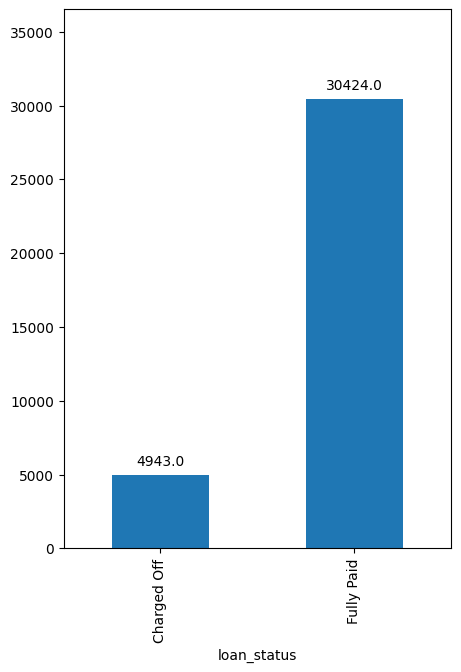

In [93]:
plt.figure(figsize=(5,7))
ax = final_loan.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

In [94]:
print("%.2f" % (final_loan.loc[final_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(final_loan)))

13.98


Approximately 14% of loans in the dataset are defaulted. Any variable that increases percentage of default to higher than 16.5% should be considered a business risk. (16.5 is 18% higher than 13.97 - a large enough increase)

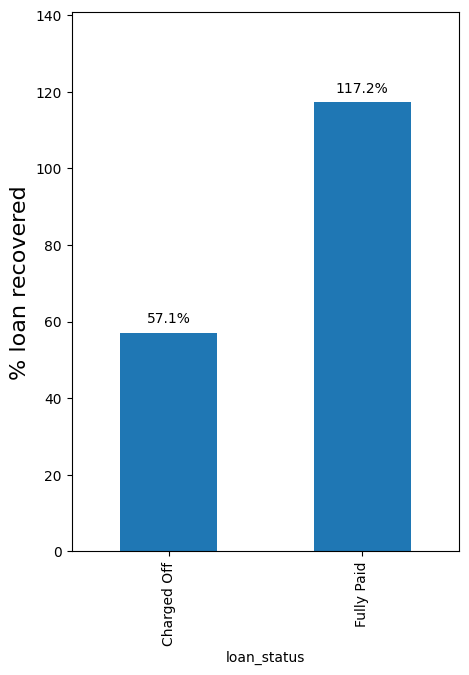

In [99]:
plt.figure(figsize=(5,7))
ax = (final_loan.groupby('loan_status').total_pymnt.sum() * 100 / final_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

<b>Lending Club only recovers 57% of the loan amount when loans are defaulted. On fully paid up loans, the company makes 17% profit.

Let us see graphs of some other important variables

<b>loan_amnt </b>: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

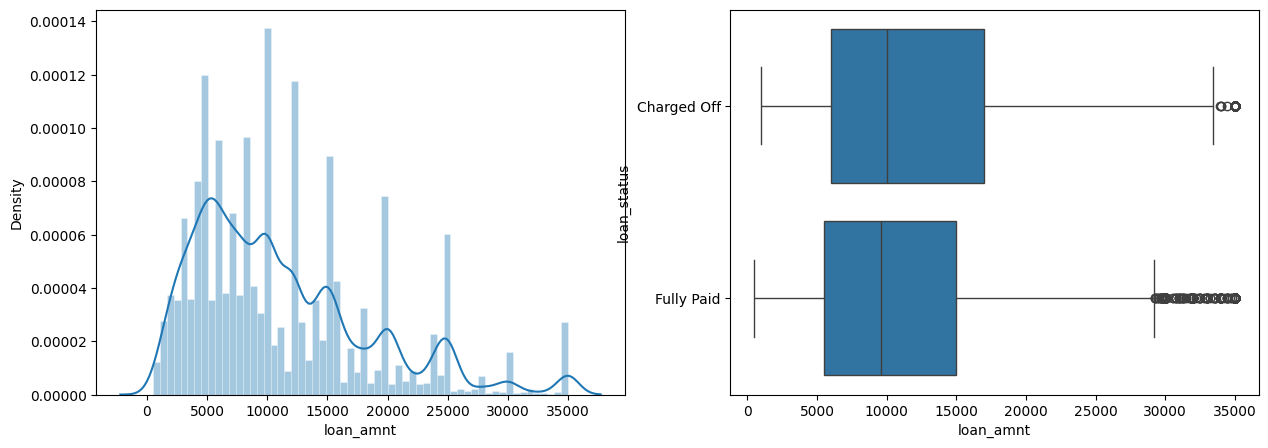

In [134]:
plot_distribution(final_loan, 'loan_amnt')

In [101]:
final_loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


<b>Observation:</b>
<ul>
<li>Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
<li>Funding amounts see a spike around each 5000 boundary. We will use 5000 as bucket size for later analysis.
<li>Charged off loans are shifted towards higher average loan amount request.
</ul>

In [102]:
#Create Derived categorical variable
final_loan['loan_amnt_bin'] = pd.cut(final_loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

<Axes: xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

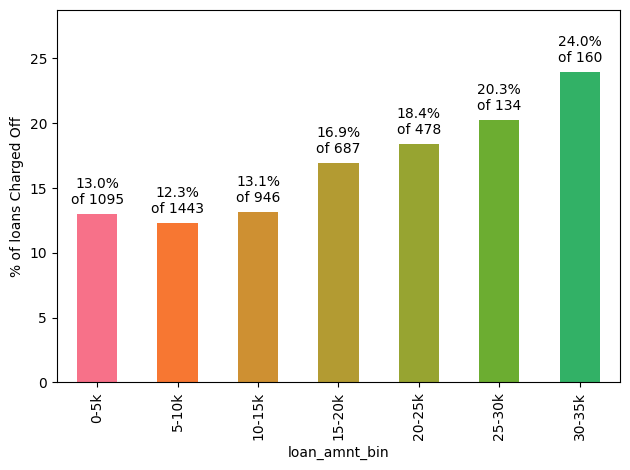

In [103]:
plotLoanStatus(final_loan, 'loan_amnt_bin')

<b>Observation:</b>
<ul>
<li>The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.
</ul>

### Other categorical variables distribution

Let's see how some other categorical variables of interest are distributed within the dataset

In [110]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('pastel', 16))
        showLabels(ax)

    plt.tight_layout()

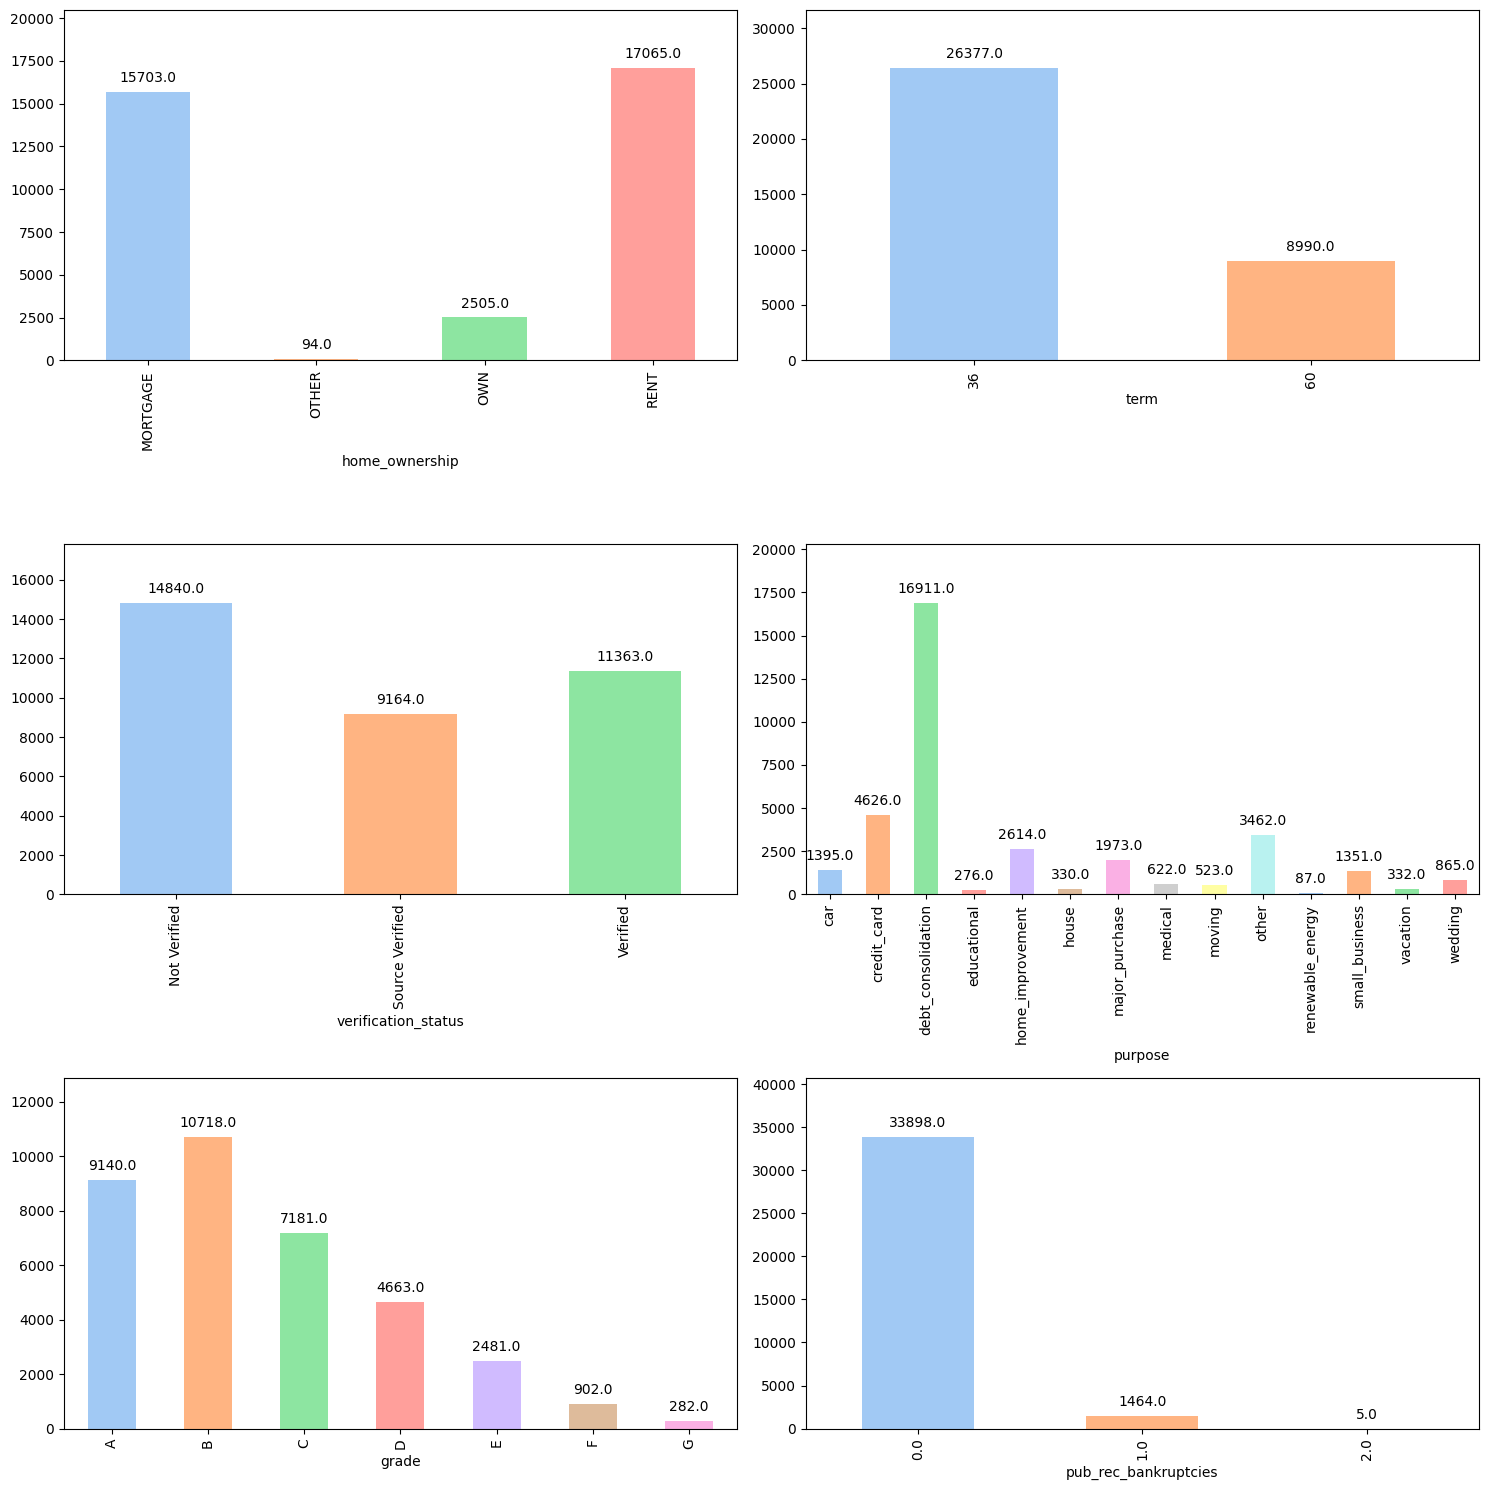

In [111]:
plt.figure(figsize=(15,15))

categoricalBarPlots(final_loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

<b>term </b>: The number of payments on the loan. Values are in months and can be either 36 or 60.

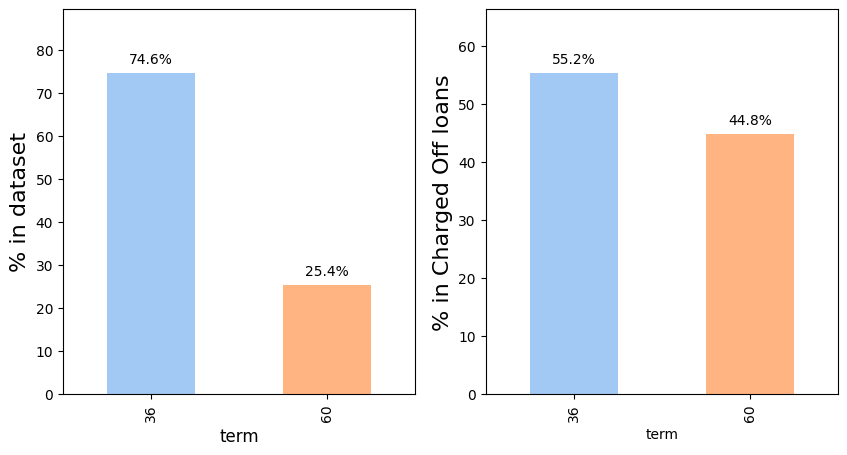

In [117]:
plt.figure(figsize=(10,5))
plot_percentages(final_loan, 'term')

<b>Observation :</b>
<ul>
<li>Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.
<li>Among Charged Off loans, percentage of term 60 months rises to 45%. The higher term loans have a higher chance of default.
</ul>

<b>purpose :</b> A category provided by the borrower for the loan request.

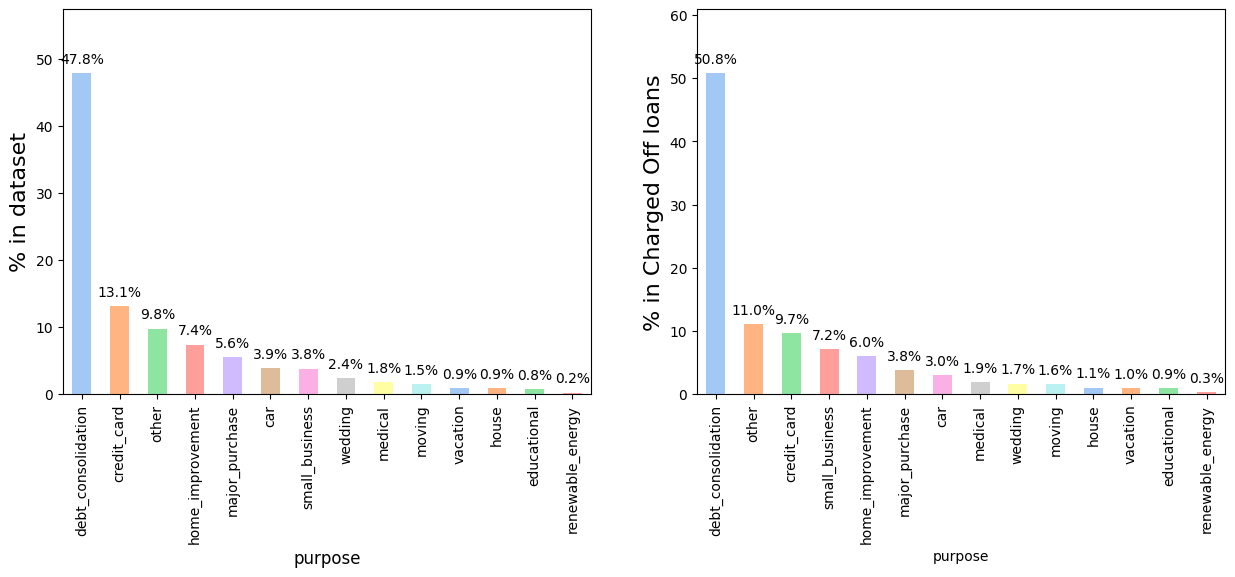

In [118]:
plt.figure(figsize=(15,5))
plot_percentages(final_loan, 'purpose')

<b>Observation :</b>

<li>The category small_business percentage doubles from 3.8 to 7.2 for Charged Off loans. Let's see how the categories of this variable behave.

<Axes: xlabel='purpose', ylabel='% of loans Charged Off'>

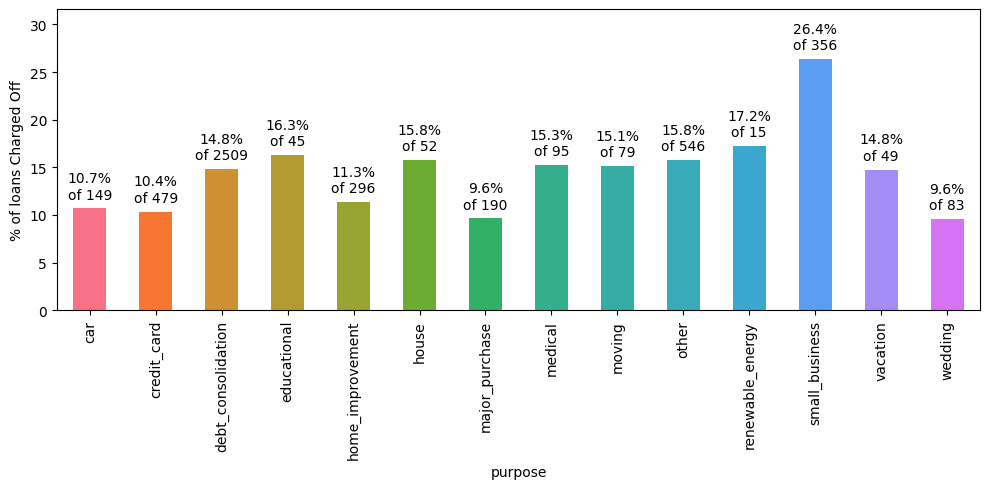

In [119]:
plt.figure(figsize=(10, 5))
plotLoanStatus(final_loan, 'purpose')

<b>Observation :</b>

<li>26% of loans for small business are Charged Off. Making them the most risky purpose.
<li>Approximately ~49% of the loans are issued for the purpose of dept consolidation.
<li>17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance.

<b>pub_rec_bankruptcy :</b> Number of public record bankruptcies

<Axes: xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

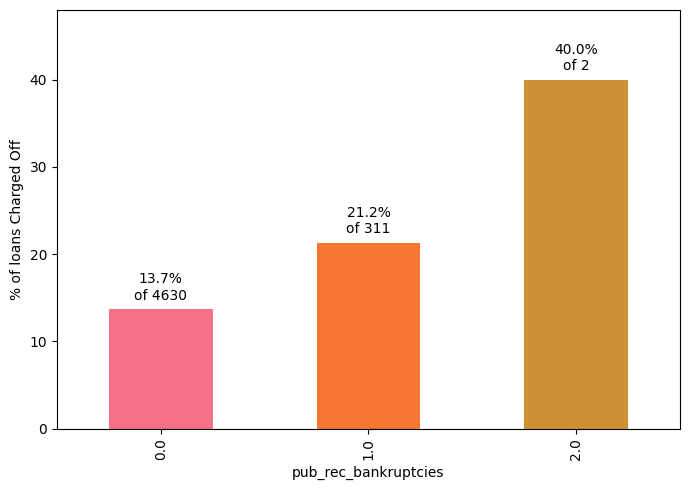

In [120]:
plt.figure(figsize=(7,5))
plotLoanStatus(final_loan, 'pub_rec_bankruptcies')

<b>Observation :</b>

<li>The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.

<b>int_rate :</b> Interest Rate on the loan.

In [122]:
final_loan.int_rate.describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

<Figure size 1500x500 with 0 Axes>

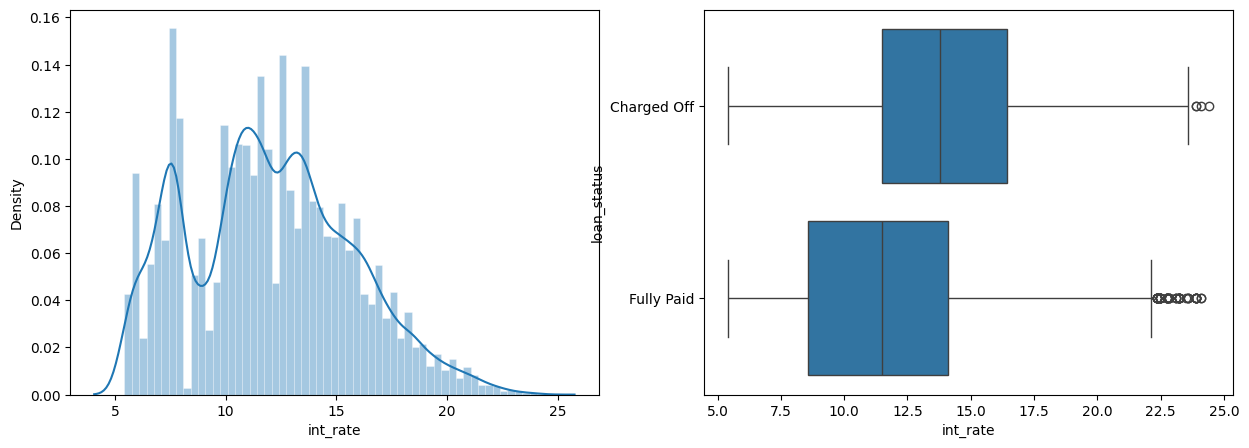

In [135]:
plt.figure(figsize=(15,5))
plot_distribution(final_loan, 'int_rate')

In [124]:
final_loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


<b>Observation :</b>

<li>Overall, the intrest rate varies from <b>5.42% </b>to <b>24.4% </b>with average intrest rate of <b>11.8%</b>.
<li>The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases. Let's analyze this more

In [125]:
final_loan['interest_rate_buckets'] = round(final_loan['int_rate'])

<Axes: xlabel='interest_rate_buckets', ylabel='% of loans Charged Off'>

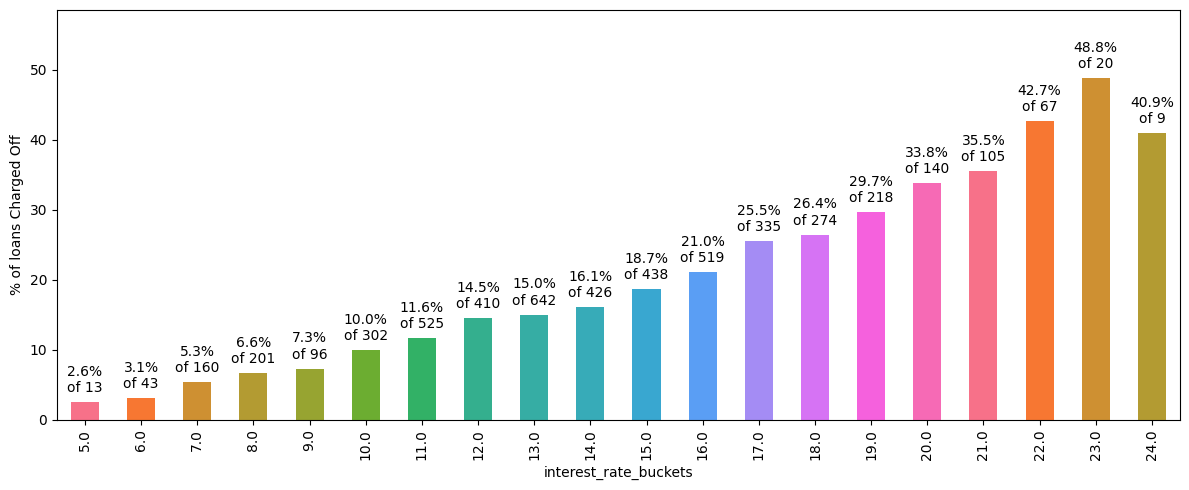

In [126]:
plt.figure(figsize=(12,5))
plotLoanStatus(final_loan, 'interest_rate_buckets')

<b>installment :</b> The monthly payment owed by the borrower if the loan originates.

In [127]:
final_loan.installment.describe()

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

<Figure size 1500x500 with 0 Axes>

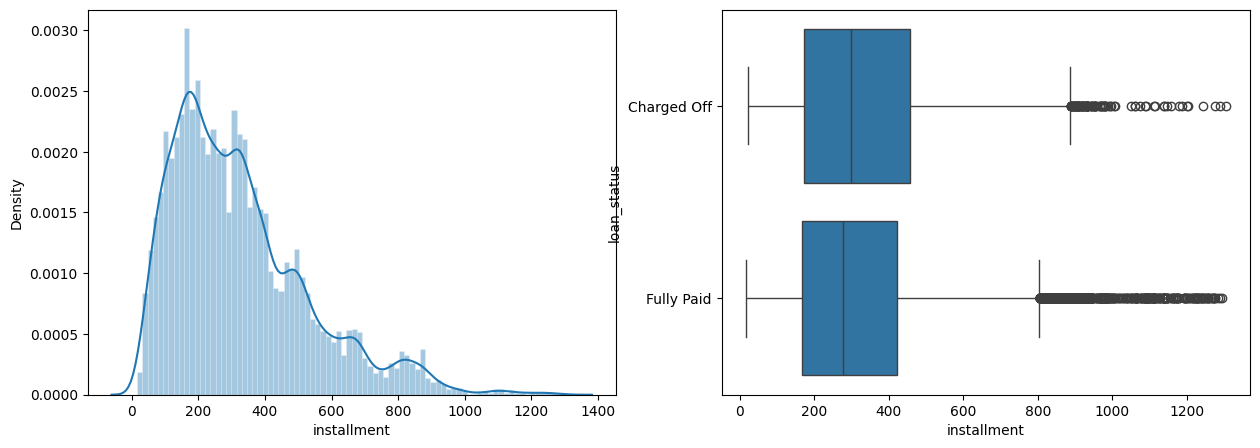

In [136]:
plt.figure(figsize=(15,5))
plot_distribution(final_loan, 'installment')

In [137]:
final_loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


<b>Observation :</b>

<li>installment amount varies largely between 170.08 to 420 with median of 280
<li>loans Charged Off have high installment on average

<b>grade and sub_grade :</b> LC assigned loan grade and subgrade.

In [138]:
final_loan.grade.value_counts()

grade
B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: count, dtype: int64

Let's find the relative frequencies of the unique sub_grade.

In [139]:
final_loan.sub_grade.value_counts(normalize=True).head()

sub_grade
A4    0.075268
B3    0.073204
A5    0.070320
B5    0.069104
B4    0.063534
Name: proportion, dtype: float64

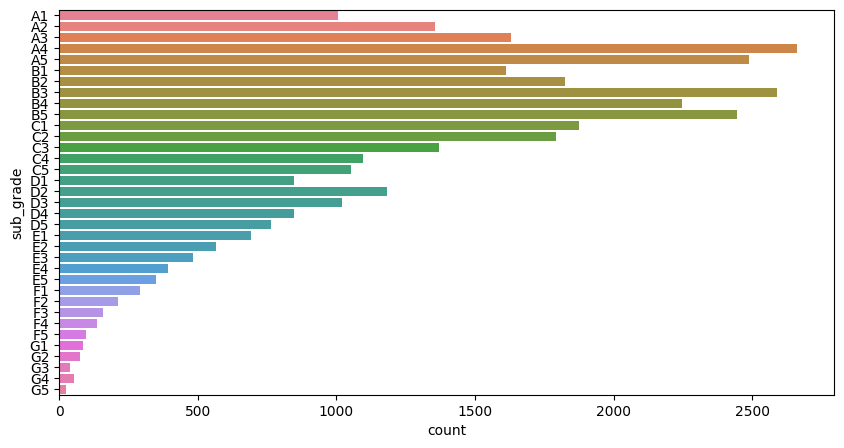

In [152]:
plt.figure(figsize=(10,5))
sns.countplot(final_loan['sub_grade'], order=sorted(final_loan.sub_grade.unique()),palette='husl')
plt.show()

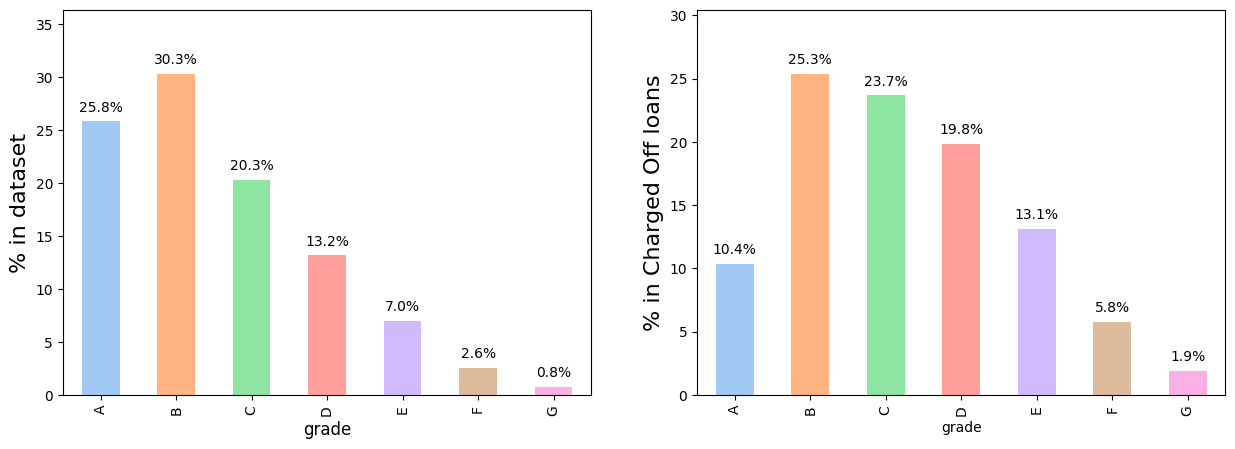

In [141]:
plt.figure(figsize=(15,5))
plot_percentages(final_loan, 'grade', True)

<b>Observation :</b>

<li>Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.
<li>Grade D, E, F, G loans are less safe. We should plot grade by percentage Charged Off by category
<li>Lending Clubs grading system is working well.

<Axes: xlabel='grade', ylabel='% of loans Charged Off'>

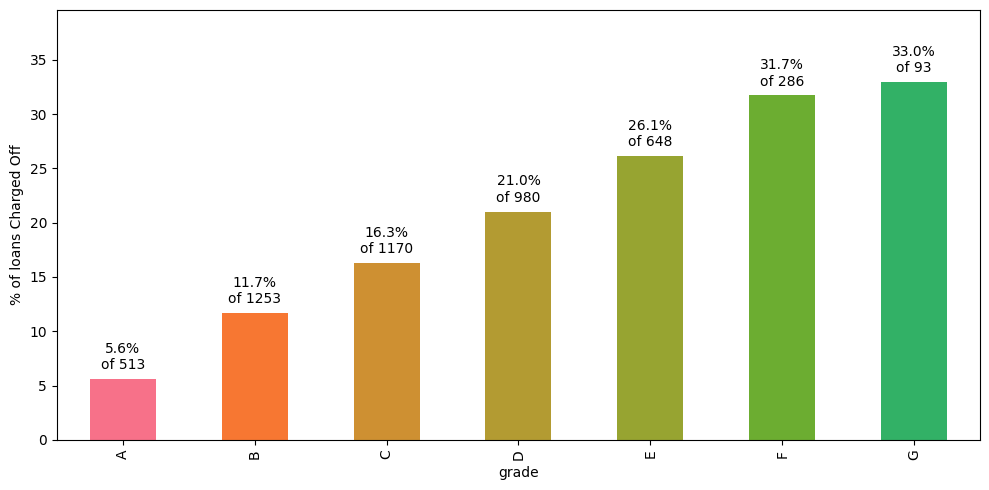

In [142]:
plt.figure(figsize=(10,5))
plotLoanStatus(final_loan, 'grade')

<b>Observation :</b>

<li>Nearly 30% of all loans in Grades F and G see a default.
<li>Grade E onwards are risky, and less numerous. Lending Club should either refuse loans or charge high interest rates.

<Axes: title={'center': 'int_rate'}, xlabel='grade'>

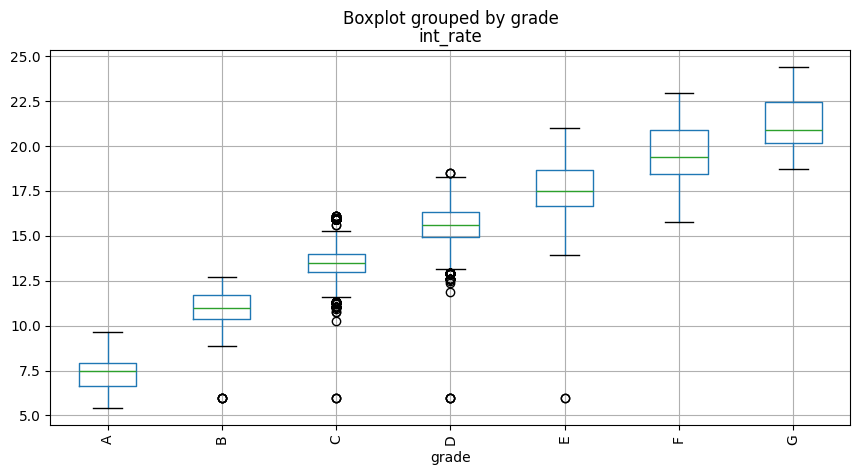

In [143]:
fig, ax = plt.subplots(figsize=(10,5))
final_loan.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

<b>Observation :</b>

<li>Here we see that Lending Club is, correctly, charging higher interest rates for lower grade loans.

<b>emp_title </b>: The job title supplied by the Borrower when applying for the loan. Employer Title replaces Employer Name for all loans listed after 9/23/2013

In [144]:
# top 10 employee
top_10_emp_title = final_loan.emp_title.value_counts(normalize=False).head(10)

C:\Users\saravanan.ponmudi\AppData\Local\Temp\ipykernel_20860\1197845952.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45)


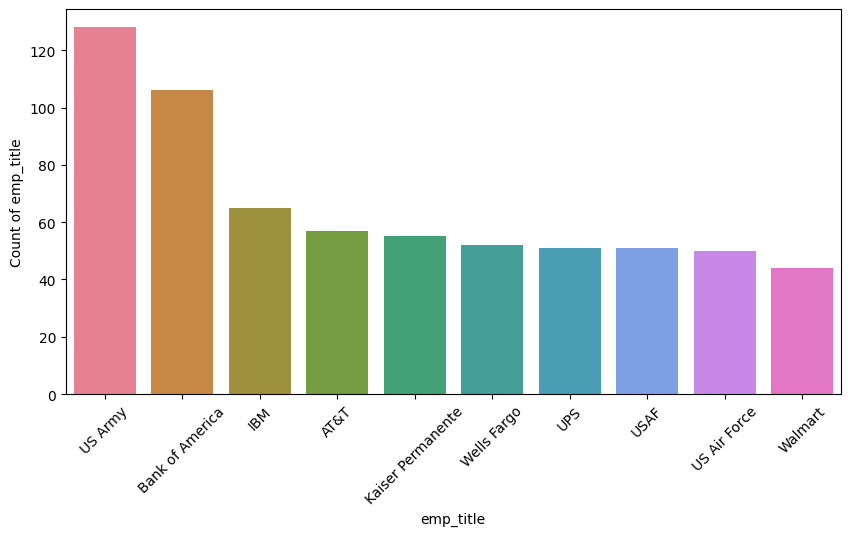

In [155]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top_10_emp_title.index, y=top_10_emp_title.values,palette='husl')
a.set_ylabel('Count of emp_title')
a.set_xticklabels(a.get_xticklabels(), rotation=45)
plt.show()

<b>Observation :</b>

<li>Max of the loan takers are from the US Army, then Bank of America follwed by IBM and AT&T.
<li>Kaiser Permanents, wells Fargo, UPS, USAF, US Air Force and Walmart are also among the top 10 emp_title loans.
<li>The numbers per employer are quite low, and this variable is unlikely to have an impact on default rates

<Axes: xlabel='emp_title', ylabel='% of loans Charged Off'>

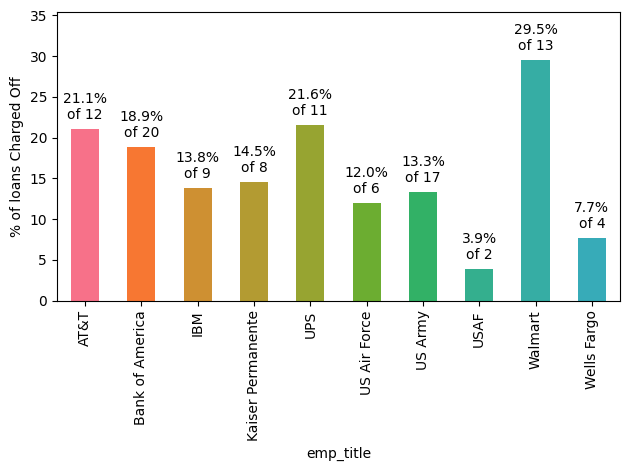

In [156]:
plotLoanStatus(final_loan[final_loan['emp_title'].isin(top_10_emp_title.index.values)], 'emp_title')

<b>emp_length</b> : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [11]:
final_loan.emp_length.value_counts()

emp_length
10    8028
2     4083
0     3978
3     3833
4     3206
5     3043
1     2959
6     2062
7     1638
8     1361
9     1176
Name: count, dtype: int64

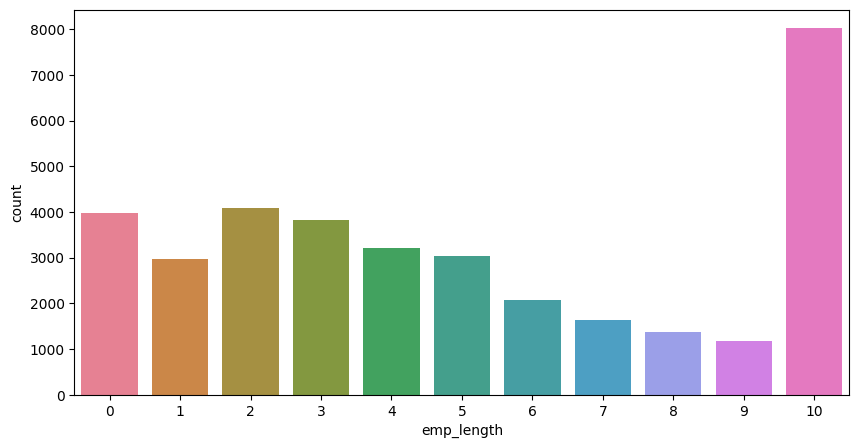

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(final_loan,x='emp_length',palette='husl')
plt.show()

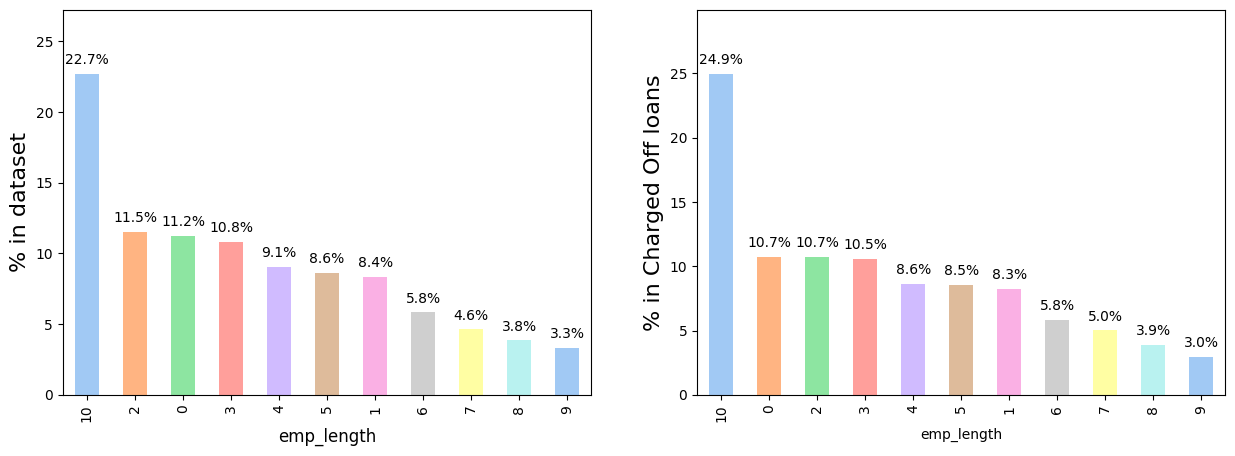

In [15]:
plt.figure(figsize=(15, 5))
plot_percentages(final_loan, 'emp_length')

<b>Observation :</b>

<li>22.7% of the of loan taker have an employment length of more than 10 years.
<li>There is no impact of employment length to chance of loan default.

<b>home_ownership</b> : The home ownership status provided by the borrower during registration. Our values are: <b>RENT, OWN, MORTGAGE, OTHER.</b>

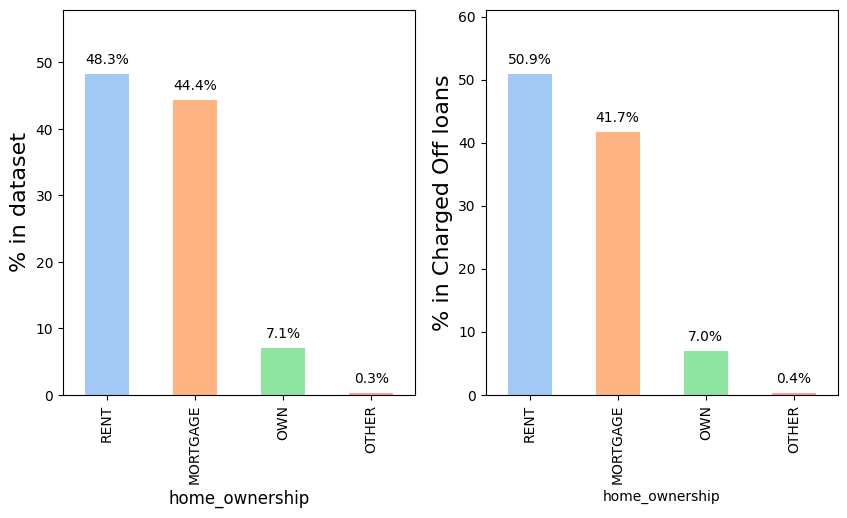

In [16]:
plt.figure(figsize=(10,5))
plot_percentages(final_loan, 'home_ownership')

<b>Observation :</b>

<li>There is no impact of home_ownership to default on loan.